# Introduction to Final Project - Predicting Google's Next Acquisition

### Introduction

In this project, we will examine which public company Google's parent company, Alphabet, would be most likely to acquire based on a series of quantitative and qualitative factors that will be tested against 3 separate data modelling techniques.

There are two primary datasets that will be used. The first one is the acquisitions dataset that covers which companies have been acquired by Alphabet over its history (specifically Alphabet Acquistions), including a further dataset that outlines the same features for other similarly large tech companies (e.g. Facebook, Apple, etc.)

### Project Hypothesis

It is important to understand Google's composition before delving into any predictions. The company itself is composed primarily of its key products - Google search + ads, Google Cloud, Android - as well as some key subsidiary products and platforms that it has acquired - Youtube, Nest, and so on. Most of these functions are already very fleshed out and have little room for growth in the traditional sense (though the argument could be made that they could simply acquire new products à la Nest). 

However, Google has another revenue stream, which they title as their 'Other Bets'. This group is composed of their various additional undertakings, including their ventures into self-driving vehicles, Google Stadia (gaming), VR/AR, and so on. The growing presence of this 'other bets' revenue stream leads me to believe that they may be more inclined to acquire a company that follows in the lines of these ventures.

### Procedure

The analysis for this project, following the initial exploratory phases, can be broken down into 3 phases. The first phase is the regression analysis, examining the potential relation between an increased stock price and several acquisition variables to determine a model that can be extrapolated for our company list. 

The 2nd phase involves a decision tree model to break down this large list of public companies into more pure, smaller subsets. The regression results will be run alongside these smaller groups to determine the best fitting groups of companies. 

The final phase involves analyzing the text in the core business functions of prior Alphabet acquisitions to obtain a bag-of-words type model that will then be applied to the list of public companies and used as the final determining factor that will result in a shortlist of potential acquisition targets for Alphabet.

Before the analysis occurs, there will several steps involved with respect to cleaning the data and exploring its various points further.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Introducing the Alphabet Acquisitions

This is the initial dataset that will be worked with, though some cleaning will occur immediately to fit it to the stock prices that are needed.

In [2]:
#clean out bad data from acquisition list (includes: out of stock analysis timeframe, poor date formatting)
##*Note that the last acquisition date for Fitbit was changed to its announcement date to account for it within this analysis

acquired = pd.read_csv("Final Project/Alphabet Acquisitions.csv")
acq = acquired[12:]
acq_list = acq[acq['Acquisition Date'].map(len) > 6]
acq_list['Acquisition Date'][232] = '1-Nov-19'
acq_listx = acq_list[acq_list['Acquisition Date'].map(len) < 10]
acq_listx

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Number,Acquisition Date,Company,Business,Country,Price,Used as or integrated with,Group,ParentCompany
12,13,27-Oct-04,Keyhole,Map analysis,United States,0,"Google Maps, Google Earth",Search,Alphabet
13,14,28-Mar-05,Urchin Software Corporation,Web analytics,United States,0,Google Analytics,Business,Alphabet
14,15,12-May-05,Dodgeball,Social networking service,United States,0,Google Latitude,Search,Alphabet
15,16,19-Jul-05,Akwan Information Technologies,Search engines,Brazil,0,Internet backbone,OS,Alphabet
17,18,17-Aug-05,Android,Mobile operating system,United States,50000000,Android,OS,Alphabet
...,...,...,...,...,...,...,...,...,...
228,229,16-Oct-19,Socratic,Learning apps,United States,0,NaN,Misc.,Alphabet
229,230,18-Nov-19,CloudSimple,Cloud hosting,United States,0,Google Cloud Platform,Productivity,Alphabet
230,231,19-Dec-19,Typhoon Studios,Video game development,Canada,0,Stadia,Media,Alphabet
231,232,14-Jan-20,Pointy,Local retail inventory feeds,Ireland,163000000,Google Maps,Search,Alphabet


In [380]:
#clean up dates to match stock data

time_object = [datetime.strptime(x, '%d-%b-%y') for x in acq_listx['Acquisition Date']]
date_list = [i.strftime('%Y-%m-%d') for i in time_object]

acq_listx['Acquisition Date'] = date_list
acq_listx

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Number,Acquisition Date,Company,Business,Country,Price,Used as or integrated with,Group,ParentCompany
12,13,2004-10-27,Keyhole,Map analysis,United States,0,"Google Maps, Google Earth",Search,Alphabet
13,14,2005-03-28,Urchin Software Corporation,Web analytics,United States,0,Google Analytics,Business,Alphabet
14,15,2005-05-12,Dodgeball,Social networking service,United States,0,Google Latitude,Search,Alphabet
15,16,2005-07-19,Akwan Information Technologies,Search engines,Brazil,0,Internet backbone,OS,Alphabet
17,18,2005-08-17,Android,Mobile operating system,United States,50000000,Android,OS,Alphabet
...,...,...,...,...,...,...,...,...,...
228,229,2019-10-16,Socratic,Learning apps,United States,0,NaN,Misc.,Alphabet
229,230,2019-11-18,CloudSimple,Cloud hosting,United States,0,Google Cloud Platform,Productivity,Alphabet
230,231,2019-12-19,Typhoon Studios,Video game development,Canada,0,Stadia,Media,Alphabet
231,232,2020-01-14,Pointy,Local retail inventory feeds,Ireland,163000000,Google Maps,Search,Alphabet


### Initializing Google's Stock Data  

Below is Google's stock data. This data will be used as the dependent variable in the regression analysis. As can be seen from the graph below, the gains and losses increased in volatility as Google itself grew in size and prominence. Looking at the table above, the latest Fitbit acquisition appears to be on the higher end of acquisition prices, which could suggest a potential correlation between these two variables.

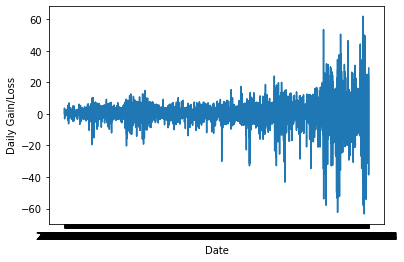

In [445]:
#initialize stock data

goog = pd.read_csv("Final Project/GOOG.csv")
goog['Daily Gain/Loss'] = goog['Close'] - goog['Open']
goog['Daily Gain/Loss']
sns.lineplot(x='Date', y='Daily Gain/Loss', data=goog)

In [382]:
#Concatenate stock data onto acquisition dataframe

acq_listx['Stock Jump'] = goog['Daily Gain/Loss']
#acq_listx['Number'] = acq_listx.index
acq_listx

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Number,Acquisition Date,Company,Business,Country,Price,Used as or integrated with,Group,ParentCompany,Stock Jump
12,13,2004-10-27,Keyhole,Map analysis,United States,0,"Google Maps, Google Earth",Search,Alphabet,0.283936
13,14,2005-03-28,Urchin Software Corporation,Web analytics,United States,0,Google Analytics,Business,Alphabet,0.777084
14,15,2005-05-12,Dodgeball,Social networking service,United States,0,Google Latitude,Search,Alphabet,-0.109589
15,16,2005-07-19,Akwan Information Technologies,Search engines,Brazil,0,Internet backbone,OS,Alphabet,1.858032
17,18,2005-08-17,Android,Mobile operating system,United States,50000000,Android,OS,Alphabet,2.012459
...,...,...,...,...,...,...,...,...,...,...
228,229,2019-10-16,Socratic,Learning apps,United States,0,NaN,Misc.,Alphabet,-0.024902
229,230,2019-11-18,CloudSimple,Cloud hosting,United States,0,Google Cloud Platform,Productivity,Alphabet,-0.229141
230,231,2019-12-19,Typhoon Studios,Video game development,Canada,0,Stadia,Media,Alphabet,3.885437
231,232,2020-01-14,Pointy,Local retail inventory feeds,Ireland,163000000,Google Maps,Search,Alphabet,3.202988


In [448]:
stock_gain = sum(acq_listx['Stock Jump'])
stock_gain

27.023647000000295

Overall, these acquisitions led to a same-day stock price increase of about $27, which alludes to a track record of inconsistent acquisition success, if this were to be the one barometer of success.

In [446]:
stock_rise = [a > 0 for a in acq_listx['Stock Jump']]
acq_listx['Rise?'] = stock_rise
gain_listx = acq_listx[acq_listx['Rise?'].isin([True])]
gain_listx #109 of 216 recorded acquisitions led to an acquisition date stock price increase

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Number,Acquisition Date,Company,Business,Country,Price,Used as or integrated with,Group,ParentCompany,Stock Jump,Rise?
12,13,2004-10-27,Keyhole,Map analysis,United States,0,"Google Maps, Google Earth",Search,Alphabet,0.283936,True
13,14,2005-03-28,Urchin Software Corporation,Web analytics,United States,0,Google Analytics,Business,Alphabet,0.777084,True
15,16,2005-07-19,Akwan Information Technologies,Search engines,Brazil,0,Internet backbone,OS,Alphabet,1.858032,True
17,18,2005-08-17,Android,Mobile operating system,United States,50000000,Android,OS,Alphabet,2.012459,True
19,20,2005-12-27,Phatbits,Widget engine,United States,0,Google Desktop,OS,Alphabet,0.811958,True
...,...,...,...,...,...,...,...,...,...,...,...
220,221,2018-10-02,Onward,"Machine learning, natural language processing",United States,0,NaN,Misc.,Alphabet,1.798264,True
222,223,2018-12-10,Sigmoid Labs,Indian railway tracking,India,40000000,NaN,Misc.,Alphabet,3.063507,True
226,227,2019-06-06,Looker,"Big data, analytics",United States,2600000000,Google Cloud Platform,Productivity,Alphabet,3.163147,True
230,231,2019-12-19,Typhoon Studios,Video game development,Canada,0,Stadia,Media,Alphabet,3.885437,True


[Text(0, 0, 'OS'),
 Text(0, 0, 'Business'),
 Text(0, 0, 'Media'),
 Text(0, 0, 'Search'),
 Text(0, 0, 'Connectivity'),
 Text(0, 0, 'Productivity'),
 Text(0, 0, 'Innovation'),
 Text(0, 0, 'Devices'),
 Text(0, 0, 'Research'),
 Text(0, 0, 'Misc.')]

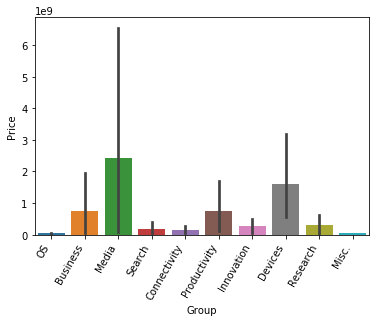

In [384]:
#filtering positive stock jumps to determine where most investment has went
public = acq_listx.copy()
public['Priced?'] = public['Price'] > 0
public1 = public[public['Priced?'].isin([True])]
public1
price_chart = sns.barplot(x='Group', y='Price', data=public1)
price_chart.set_xticklabels(price_chart.get_xticklabels(), rotation=60, horizontalalignment='right')
#

In the graph above, we see that, broken down into the various functional groups of these acquisitions, the greatest investments went into Media and Devices, attributed in large to the purchases of Fitbit, Nest, and Youtube.

In [449]:
np.corrcoef(acq_listx['Price'], acq_listx['Stock Jump'])
#almost no correlation between acquisition price and acq date stock price change

array([[1.        , 0.02427733],
       [0.02427733, 1.        ]])

Despite the initial suggestions, there appears to be very little correlation between the acquisition price and the stock price differentials, an implication that the regression may not run too smoothly.

### Initializing the Regression Analysis

Using a combination of the price data, as well as a binary definition of the various functional groups, a regression equation will be created to model the stock price jumps, in the form of:

                                       R(x) = β(Price)*x1 + Σ[2,n] β(Group n)*xn
                                            
Where n is the specific binary variable associated with the functional group.

In [387]:
import statsmodels.formula.api as smf

Let's initialize the binary variables for the respective groups.

In [451]:
acq_listy = acq_listx.copy()
acq_listy['StockJump'] = acq_listy['Stock Jump']
acq_listy['Search'] = np.where(acq_listy['Group'] == 'Search', 1,0)
acq_listy['Media'] = np.where(acq_listy['Group'] == 'Media', 1,0)
acq_listy['Devices'] = np.where(acq_listy['Group'] == 'Devices', 1,0)
acq_listy['OS'] = np.where(acq_listy['Group'] == 'OS', 1,0)
acq_listy['Connectivity'] = np.where(acq_listy['Group'] == 'Connectivity', 1,0)
acq_listy['Organization'] = np.where(acq_listy['Group'] == 'Organization', 1,0)
acq_listy['Productivity'] = np.where(acq_listy['Group'] == 'Productivity', 1,0)
acq_listy['Business'] = np.where(acq_listy['Group'] == 'Business', 1,0)
acq_listy['Research'] = np.where(acq_listy['Group'] == 'Research', 1,0)
acq_listy['Innovation'] = np.where(acq_listy['Group'] == 'Innovation', 1,0)
acq_listy['Misc'] = np.where(acq_listy['Group'] == 'Misc.', 1,0)
acq_listy

,Number,Acquisition Date,Company,Business,Country,Price,Used as or integrated with,Group,ParentCompany,Stock Jump,...,Search,Media,Devices,OS,Connectivity,Organization,Productivity,Research,Innovation,Misc
12,13,2004-10-27,Keyhole,0,United States,0,"Google Maps, Google Earth",Search,Alphabet,0.283936,...,1,0,0,0,0,0,0,0,0,0
13,14,2005-03-28,Urchin Software Corporation,1,United States,0,Google Analytics,Business,Alphabet,0.777084,...,0,0,0,0,0,0,0,0,0,0
14,15,2005-05-12,Dodgeball,0,United States,0,Google Latitude,Search,Alphabet,-0.109589,...,1,0,0,0,0,0,0,0,0,0
15,16,2005-07-19,Akwan Information Technologies,0,Brazil,0,Internet backbone,OS,Alphabet,1.858032,...,0,0,0,1,0,0,0,0,0,0
17,18,2005-08-17,Android,0,United States,50000000,Android,OS,Alphabet,2.012459,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,229,2019-10-16,Socratic,0,United States,0,NaN,Misc.,Alphabet,-0.024902,...,0,0,0,0,0,0,0,0,0,1
229,230,2019-11-18,CloudSimple,0,United States,0,Google Cloud Platform,Productivity,Alphabet,-0.229141,...,0,0,0,0,0,0,1,0,0,0
230,231,2019-12-19,Typhoon Studios,0,Canada,0,Stadia,Media,Alphabet,3.885437,...,0,1,0,0,0,0,0,0,0,0
231,232,2020-01-14,Pointy,0,Ireland,163000000,Google Maps,Search,Alphabet,3.202988,...,1,0,0,0,0,0,0,0,0,0


Following this, we also filter out the data points where there is no price value (a result of a private acquisition) to hopefully obtain a better model.

In [452]:
acq_public = acq_listy.copy()
acq_public['Priced?'] = acq_public['Price'] > 0
acq_public1 = acq_public[acq_public['Priced?'].isin([True])]
acq_public1

,Number,Acquisition Date,Company,Business,Country,Price,Used as or integrated with,Group,ParentCompany,Stock Jump,...,Media,Devices,OS,Connectivity,Organization,Productivity,Research,Innovation,Misc,Priced?
17,18,2005-08-17,Android,0,United States,50000000,Android,OS,Alphabet,2.012459,...,0,0,1,0,0,0,0,0,0,True
22,23,2006-01-17,dMarc Broadcasting,1,United States,102000000,AdSense,Business,Alphabet,-0.981323,...,0,0,0,0,0,0,0,0,0,True
29,30,2006-10-09,YouTube,0,United States,1650000000,YouTube,Media,Alphabet,-0.149436,...,1,0,0,0,0,0,0,0,0,True
31,32,2006-12-18,Endoxon,0,Switzerland,28000000,Google Maps,Search,Alphabet,-0.094651,...,0,0,0,0,0,0,0,0,0,True
32,33,2007-02-16,Adscape,1,United States,23000000,AdSense,Business,Alphabet,1.848068,...,0,0,0,0,0,0,0,0,0,True
36,37,2007-04-19,Marratech,0,Sweden,15000000,"Google Talk, Google Hangouts",Connectivity,Alphabet,-0.866753,...,0,0,0,1,0,0,0,0,0,True
37,38,2007-04-13,DoubleClick,1,United States,3100000000,AdSense,Business,Alphabet,1.474472,...,0,0,0,0,0,0,0,0,0,True
40,41,2007-06-03,FeedBurner,0,United States,100000000,FeedBurner,Search,Alphabet,-0.408470,...,0,0,0,0,0,0,0,0,0,True
43,44,2007-07-02,GrandCentral,0,United States,45000000,Google Voice,Connectivity,Alphabet,-3.755920,...,0,0,0,1,0,0,0,0,0,True
45,46,2007-07-09,Postini,0,United States,625000000,Gmail,Connectivity,Alphabet,0.941467,...,0,0,0,1,0,0,0,0,0,True


### Linear Regression Results

In [390]:
train_reg = smf.ols(data=acq_public1, formula = "np.power(StockJump,2) ~ np.log(Price) + Media + Devices + Connectivity + Productivity + Misc").fit()
train_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.power(StockJump, 2)   R-squared:                       0.202
Model:                                OLS   Adj. R-squared:                  0.096
Method:                     Least Squares   F-statistic:                     1.904
Date:                    Fri, 19 Jun 2020   Prob (F-statistic):              0.101
Time:                            04:16:09   Log-Likelihood:                -181.38
No. Observations:                      52   AIC:                             376.8
Df Residuals:                          45   BIC:                             390.4
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.0748     14.401      1.116      0.270     -12.931      45.080
np.log(Price)    -0.7792      0.780     -1.000      0.323      -2.349       0.791
Media             2.4275      3.945      0.615      0.541      -5.517      10.372
Devices          11.0602      5.582      1.982      0.054      -0.182      22.302
Connectivity      4.4380      2.993      1.483      0.145      -1.590      10.466
Productivity     12.3165      4.254      2.895      0.006       3.748      20.885
Misc              6.9494      8.704      0.798      0.429     -10.582      24.481
==============================================================================
Omnibus:                       31.568   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.604
Skew:                           1.782   Prob(JB):                     2.83e-16
Kurtosis:                       7.511   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Well that's unfortunate. Given the low R^2 and the even lower adjusted R^2, we can conclude that this linear regression model should not be used. It should be noted that multiple variations of this were tested using the many binary variables, and the displayed R^2 = 0.202 was the best result.

In [391]:
np.corrcoef(public1['Price'], public1['Stock Jump'])

array([[1.       , 0.0388495],
       [0.0388495, 1.       ]])

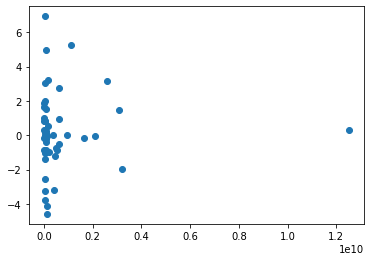

In [392]:
plt.scatter(x=public1['Price'], y=public1['Stock Jump'])

A deeper dive into this data tells us that there remains little correlation between the key price variable and the stock jumps, which resulted in the poor linear regression results.

### Logistic Regression Approach

Instead of a linear regression, let's approach this situation with a logistic regression. The core variable in this case will also be switched up: rather than focusing on the stock price differentials, the focus will be placed on whether it is an Alphabet acquisition or not. As a result, we merge our previous dataset with another dataset that a sampling of acquisitions from other similar companies, like Facebook, Apple, IBM, and so on.

In [394]:
acquired = pd.read_csv('Final Project/acquisitions.csv')
acquired

,Acquisition Date,Company,Business,Country,Price,Used as or integrated with,Group,ParentCompany
0,11-Feb-05,Verdisoft,Wireless data sharing,United States,58000000,Yahoo! Mobile,OS,Yahoo
1,20-Mar-05,Ludicorp,Image hosting service,Canada,40000000,Flickr,Search,Yahoo
2,17-Aug-05,Android,Mobile operating system,United States,50000000,Android,OS,Alphabet
3,23-Aug-05,facebook.com domain name,AboutFace,United States,200000,name change from Thefacebook.com,Business,Facebook
4,12-Dec-05,del.icio.us,Social bookmarking,United States,20000000,del.icio.us,Search,Yahoo
...,...,...,...,...,...,...,...,...
86,10-Dec-18,Sigmoid Labs,Indian railway tracking,India,40000000,NaN,Misc.,Alphabet
87,03-Jan-19,Superpod,Question and answer app,United States,60000000,Google Assistant,Search,Alphabet
88,06-Jun-19,Looker,"Big data, analytics",United States,2600000000,Google Cloud Platform,Productivity,Alphabet
89,01-Nov-19,Fitbit,Wearables,United States,2100000000,NaN,NaN,Alphabet


As a result, we set our 'Google' column, which tells us whether it is a Google purchase or not. This binary variable thus becomes the focus of our logistic regression.

In [444]:
acquired['Google'] = np.where(acquired['ParentCompany']=="Alphabet", 1, 0)
acquired['Group'][89] = "Devices"
acquired

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Acquisition Date,Company,Business,Country,Price,Used as or integrated with,Group,ParentCompany,Google,Search,Media,Devices,OS,Connectivity,Productivity,Research,Innovation,Misc
0,11-Feb-05,Verdisoft,0,United States,58000000,Yahoo! Mobile,OS,Yahoo,0,0,0,0,1,0,0,0,0,0
1,20-Mar-05,Ludicorp,0,Canada,40000000,Flickr,Search,Yahoo,0,1,0,0,0,0,0,0,0,0
2,17-Aug-05,Android,0,United States,50000000,Android,OS,Alphabet,1,0,0,0,1,0,0,0,0,0
3,23-Aug-05,facebook.com domain name,1,United States,200000,name change from Thefacebook.com,Business,Facebook,0,0,0,0,0,0,0,0,0,0
4,12-Dec-05,del.icio.us,0,United States,20000000,del.icio.us,Search,Yahoo,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,10-Dec-18,Sigmoid Labs,0,India,40000000,NaN,Misc.,Alphabet,1,0,0,0,0,0,0,0,0,1
87,03-Jan-19,Superpod,0,United States,60000000,Google Assistant,Search,Alphabet,1,1,0,0,0,0,0,0,0,0
88,06-Jun-19,Looker,0,United States,2600000000,Google Cloud Platform,Productivity,Alphabet,1,0,0,0,0,0,1,0,0,0
89,01-Nov-19,Fitbit,0,United States,2100000000,NaN,Devices,Alphabet,1,0,0,1,0,0,0,0,0,0


In [397]:
acquired['Search'] = np.where(acquired['Group'] == 'Search', 1,0)
acquired['Media'] = np.where(acquired['Group'] == 'Media', 1,0)
acquired['Devices'] = np.where(acquired['Group'] == 'Devices', 1,0)
acquired['OS'] = np.where(acquired['Group'] == 'OS', 1,0)
acquired['Connectivity'] = np.where(acquired['Group'] == 'Connectivity', 1,0)
acquired['Productivity'] = np.where(acquired['Group'] == 'Productivity', 1,0)
acquired['Business'] = np.where(acquired['Group'] == 'Business', 1,0)
acquired['Research'] = np.where(acquired['Group'] == 'Research', 1,0)
acquired['Innovation'] = np.where(acquired['Group'] == 'Innovation', 1,0)
acquired['Misc'] = np.where(acquired['Group'] == 'Misc.', 1,0)
acquired

,Acquisition Date,Company,Business,Country,Price,Used as or integrated with,Group,ParentCompany,Google,Search,Media,Devices,OS,Connectivity,Productivity,Research,Innovation,Misc
0,11-Feb-05,Verdisoft,0,United States,58000000,Yahoo! Mobile,OS,Yahoo,0,0,0,0,1,0,0,0,0,0
1,20-Mar-05,Ludicorp,0,Canada,40000000,Flickr,Search,Yahoo,0,1,0,0,0,0,0,0,0,0
2,17-Aug-05,Android,0,United States,50000000,Android,OS,Alphabet,1,0,0,0,1,0,0,0,0,0
3,23-Aug-05,facebook.com domain name,1,United States,200000,name change from Thefacebook.com,Business,Facebook,0,0,0,0,0,0,0,0,0,0
4,12-Dec-05,del.icio.us,0,United States,20000000,del.icio.us,Search,Yahoo,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,10-Dec-18,Sigmoid Labs,0,India,40000000,NaN,Misc.,Alphabet,1,0,0,0,0,0,0,0,0,1
87,03-Jan-19,Superpod,0,United States,60000000,Google Assistant,Search,Alphabet,1,1,0,0,0,0,0,0,0,0
88,06-Jun-19,Looker,0,United States,2600000000,Google Cloud Platform,Productivity,Alphabet,1,0,0,0,0,0,1,0,0,0
89,01-Nov-19,Fitbit,0,United States,2100000000,NaN,Devices,Alphabet,1,0,0,1,0,0,0,0,0,0


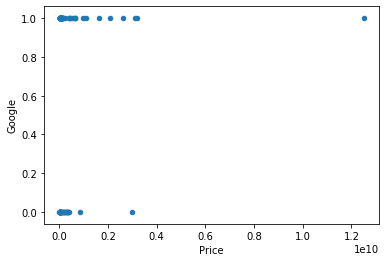

In [401]:
acquired.plot.scatter('Price', 'Google')

In [413]:
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap
import math

### Logistic Regression Results

In [433]:
X = acquired[['Price', 'Search']]
y = acquired['Google']

acquired_log_model = linear_model.LogisticRegression(solver='liblinear')
acquired_log_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [434]:
price_coef = acquired_log_model.coef_[0][0]
price_coef

6.326367660145028e-10

In [435]:
search_coef = acquired_log_model.coef_[0][1]
search_coef

3.4703511231594793e-19

In [436]:
acquired_intercept = acquired_log_model.intercept_[0]
acquired_intercept

1.2044060871689949e-18

### P(Google|Price, Search) = 1/(1+EXP**(-(1.204e-18 + 6.326e-10 + 3.470e-19)))

In [437]:
import mpl_toolkits.mplot3d as m3d

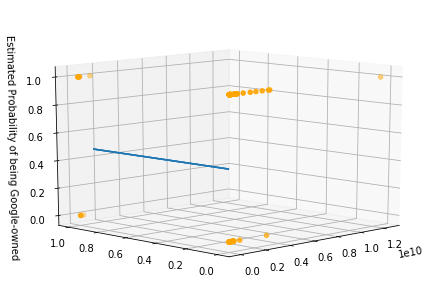

In [443]:
price = np.arange(0,5,.4)
search = np.arange(0,1,.1)
xx, yy = np.meshgrid(price, search)
Z = 1/(1 + 2.71**(-(acquired_intercept + price_coef*xx + search_coef*yy)))
fig3d = m3d.Axes3D(plt.figure())
fig3d.plot_wireframe(xx, yy, Z, rstride=10, cstride=10);
#fig3d.set_ylabel('Months since last donation')
fig3d.set_zlabel('Estimated Probability of being Google-owned')
fig3d.view_init(12, 225)
fig3d.scatter3D(xs=acquired['Price'], ys=acquired['Search'], zs=acquired['Google'], color = 'orange')
plt.show();

In [442]:
X1 = acquired[['Price', 'Search', 'Media', 'Devices', 'OS', 'Connectivity', 'Productivity', 'Business', 'Research', 'Innovation', 'Misc']]

acquired_log_model_1 = linear_model.LogisticRegression(solver='liblinear')
acquired_log_model_1.fit(X1,y)
acquired_log_model_1.score(X1,y)

0.5714285714285714

Despite the passable model score of 0.57, the coefficients prove to so low that the logistic function turns out to be no more than a slightly slanted straight line, proving that the logistic regression does not work either with this dataset. 

Funnily enough, if you graph out the resulting logistic equation - given the restrictions that price cannot be less than 0 and that the search variable is either 0 or 1 -, the lower bound of the output equals to just over 0.5, which, for a binary result, means that this model would only predict that they should be a Google acquisition (rounding to a 1 on a [0,1] scale. This conclusion renders this model completely invalid. A different approach will need to be taken when going forward with the decision tree model.